In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
os.chdir('..')
from db_connection.connection import PostgresConnection

 
from src.utils import missing_values_table, convert_bytes_to_megabytes

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [3]:
db = PostgresConnection(dbname='telecom', user='postgres', password='postgres')
db.connect()

# Example query
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [4]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [5]:
df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [6]:
print(df.dtypes)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [7]:

# Display the initial data structure
print("Initial Data Columns:")
print(df.columns.tolist())

Initial Data Columns:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes

In [8]:
# Function to replace missing values and handle outliers
def handle_missing_outliers(column):
    # Replace missing values with column mean (for numerical) or mode (for categorical)
    if column.dtype in ['int64', 'float64']:
        mean_value = column.mean()
        column.fillna(mean_value, inplace=True)
        # Identify outliers using IQR
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column.clip(lower=lower_bound, upper=upper_bound, inplace=True)
    else:
        mode_value = column.mode()[0]
        column.fillna(mode_value, inplace=True)
    
    return column

In [9]:

# Handle missing values and outliers for relevant columns
df['TCP DL Retrans. Vol (Bytes)'] = handle_missing_outliers(df['TCP DL Retrans. Vol (Bytes)'])
df['Avg RTT DL (ms)'] = handle_missing_outliers(df['Avg RTT DL (ms)'])
df['Avg Bearer TP DL (kbps)'] = handle_missing_outliers(df['Avg Bearer TP DL (kbps)'])

In [10]:

# Aggregate per customer
# Assuming 'MSISDN/Number' as the unique identifier for customers
aggregated_data = df.groupby('MSISDN/Number').agg(
    Average_TCP_Retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean'),
    Average_RTT=('Avg RTT DL (ms)', 'mean'),
    Handset_Type=('Handset Type', lambda x: x.mode()[0]),  # Most common handset type
    Average_Throughput=('Avg Bearer TP DL (kbps)', 'mean')
).reset_index()

# Display the aggregated results
print("Aggregated User Experience Data:")
print(aggregated_data.head())

Aggregated User Experience Data:
   MSISDN/Number  Average_TCP_Retransmission  Average_RTT  \
0   3.360100e+10                2.080991e+07    46.000000   
1   3.360100e+10                2.080991e+07    30.000000   
2   3.360100e+10                2.080991e+07   109.795706   
3   3.360101e+10                1.066000e+03    69.000000   
4   3.360101e+10                1.507977e+07    57.000000   

                     Handset_Type  Average_Throughput  
0  Huawei P20 Lite Huawei Nova 3E                37.0  
1          Apple iPhone 7 (A1778)                48.0  
2                       undefined                48.0  
3         Apple iPhone 5S (A1457)               204.0  
4         Apple iPhone Se (A1723)             20197.5  


In [11]:

# Save the aggregated data to a new CSV file if needed
aggregated_data.to_csv('aggregated_user_experience.csv', index=False)

In [12]:
# Function to compute top, bottom, and most frequent values
def compute_values(column_name):
    # Get the column data
    column_data = df[column_name].dropna()  # Drop NA values
    
    # Top 10 values
    top_10 = column_data.nlargest(10)
    
    # Bottom 10 values
    bottom_10 = column_data.nsmallest(10)
    
    # Most frequent values
    most_frequent = column_data.value_counts().nlargest(10)
    
    return top_10, bottom_10, most_frequent

In [13]:

# Compute values for TCP retransmission, RTT, and throughput
tcp_top, tcp_bottom, tcp_frequent = compute_values('TCP DL Retrans. Vol (Bytes)')
rtt_top, rtt_bottom, rtt_frequent = compute_values('Avg RTT DL (ms)')
throughput_top, throughput_bottom, throughput_frequent = compute_values('Avg Bearer TP DL (kbps)')

In [14]:

# Display results
print("\nTop 10 TCP Values:")
print(tcp_top)

print("\nBottom 10 TCP Values:")
print(tcp_bottom)

print("\nMost Frequent TCP Values:")
print(tcp_frequent)


Top 10 TCP Values:
147    5.002539e+07
175    5.002539e+07
440    5.002539e+07
538    5.002539e+07
555    5.002539e+07
557    5.002539e+07
566    5.002539e+07
578    5.002539e+07
606    5.002539e+07
655    5.002539e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Values:
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP Values:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
5.002539e+07     2525
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64


In [15]:
print("\nTop 10 RTT Values:")
print(rtt_top)

print("\nBottom 10 RTT Values:")
print(rtt_bottom)

print("\nMost Frequent RTT Values:")
print(rtt_frequent)


Top 10 RTT Values:
20     221.989265
30     221.989265
68     221.989265
154    221.989265
351    221.989265
385    221.989265
420    221.989265
467    221.989265
470    221.989265
471    221.989265
Name: Avg RTT DL (ms), dtype: float64

Bottom 10 RTT Values:
42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
124544    0.0
142526    0.0
143878    0.0
71739     2.0
Name: Avg RTT DL (ms), dtype: float64

Most Frequent RTT Values:
Avg RTT DL (ms)
109.795706    27829
221.989265     7718
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
Name: count, dtype: int64


In [16]:
print("\nTop 10 Throughput Values:")
print(throughput_top)

print("\nBottom 10 Throughput Values:")
print(throughput_bottom)

print("\nMost Frequent Throughput Values:")
print(throughput_frequent)


Top 10 Throughput Values:
61     49210.5
78     49210.5
86     49210.5
124    49210.5
132    49210.5
140    49210.5
155    49210.5
158    49210.5
162    49210.5
170    49210.5
Name: Avg Bearer TP DL (kbps), dtype: float64

Bottom 10 Throughput Values:
13      0.0
149     0.0
364     0.0
546     0.0
618     0.0
679     0.0
756     0.0
809     0.0
893     0.0
1185    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Most Frequent Throughput Values:
Avg Bearer TP DL (kbps)
49210.5    13235
23.0        7324
43.0        4352
44.0        4186
6.0         3983
22.0        2867
48.0        2778
63.0        2757
42.0        2689
45.0        2644
Name: count, dtype: int64


In [17]:
# Aggregate average throughput and average TCP retransmission per handset type
aggregated_data = df.groupby('Handset Type').agg(
    Average_Throughput=('Avg Bearer TP DL (kbps)', 'mean'),
    Average_TCP_Retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean')
).reset_index()

In [18]:

# Display the aggregated results
print("Aggregated Data per Handset Type:")
print(aggregated_data)


Aggregated Data per Handset Type:
                                           Handset Type  Average_Throughput  \
0                            A-Link Telecom I. Cubot A5         23184.00000   
1                     A-Link Telecom I. Cubot Note Plus          6527.00000   
2                        A-Link Telecom I. Cubot Note S          8515.00000   
3                          A-Link Telecom I. Cubot Nova         49210.50000   
4                         A-Link Telecom I. Cubot Power         49210.50000   
...                                                 ...                 ...   
1391  Zte Zte Blade C2 Smartphone Android By Sfr Sta...            44.50000   
1392                          Zyxel Communicat. Lte7460         39741.00000   
1393                          Zyxel Communicat. Sbg3600         49210.50000   
1394                    Zyxel Communicat. Zyxel Wah7706          1263.00000   
1395                                          undefined          7356.26338   

      Average_TCP

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_8140\2294228457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_data, x='Handset Type', y='Average_Throughput', palette='viridis')


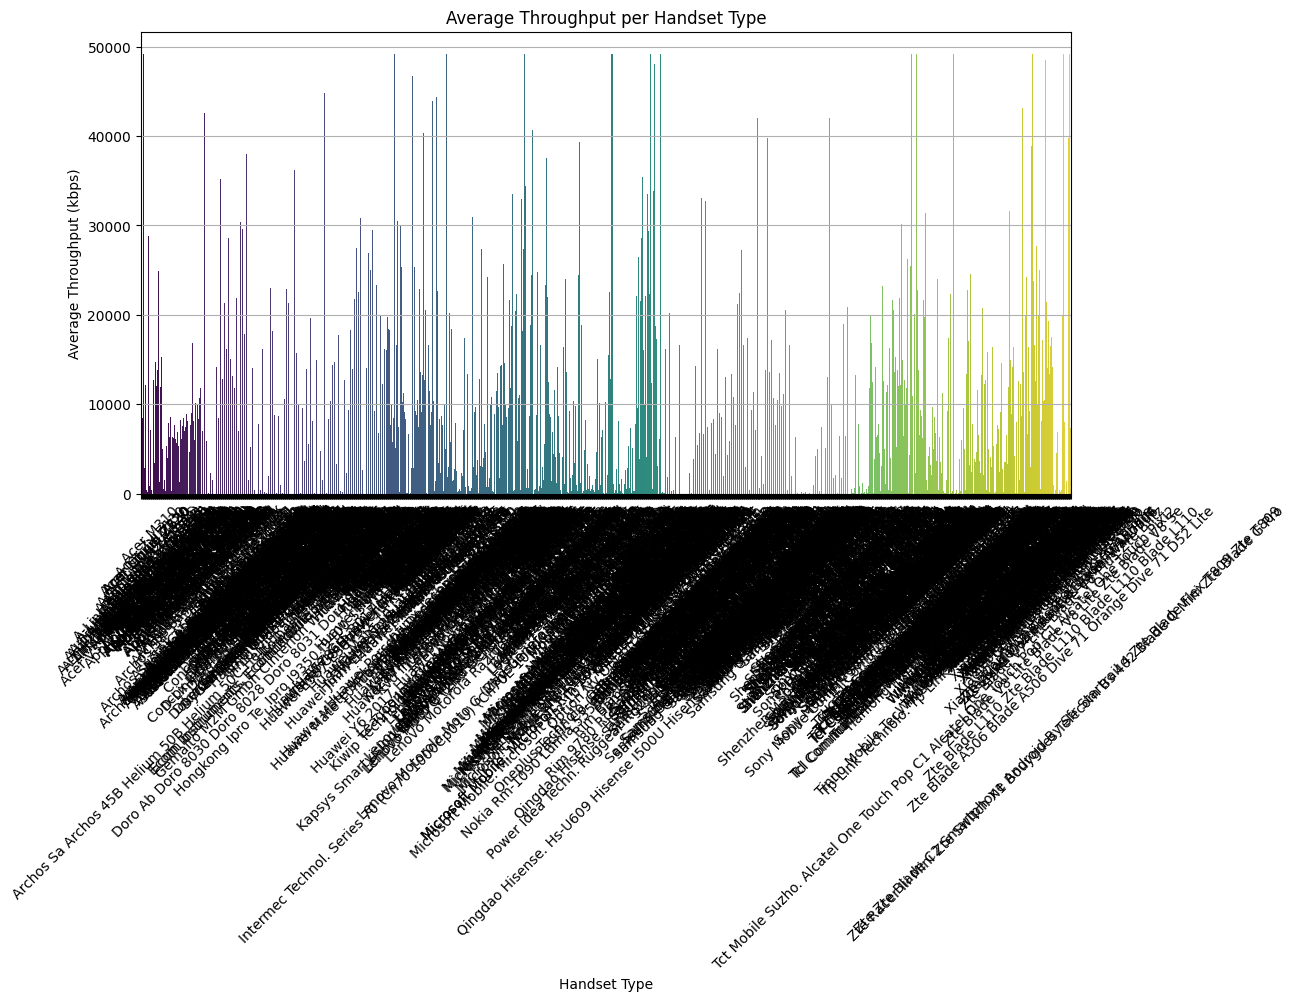

In [19]:
import seaborn as sns
# Plotting the average throughput per handset type
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='Handset Type', y='Average_Throughput', palette='viridis')
plt.title('Average Throughput per Handset Type')
plt.xticks(rotation=45)
plt.ylabel('Average Throughput (kbps)')
plt.xlabel('Handset Type')
plt.grid(axis='y')
plt.show()

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_8140\3309845273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_data, x='Handset Type', y='Average_TCP_Retransmission', palette='plasma')


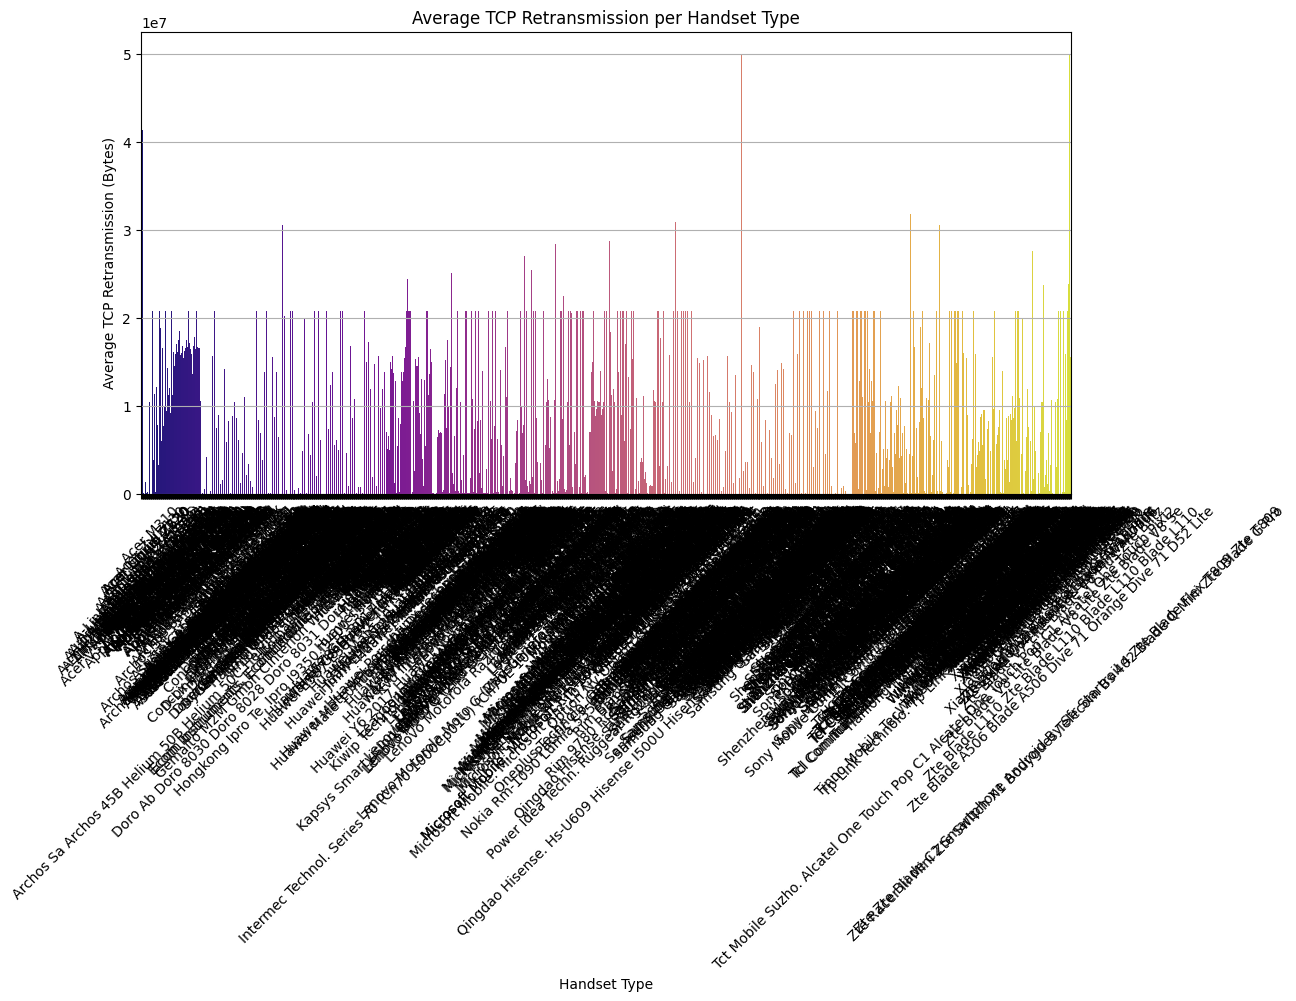

In [20]:

# Plotting the average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='Handset Type', y='Average_TCP_Retransmission', palette='plasma')
plt.title('Average TCP Retransmission per Handset Type')
plt.xticks(rotation=45)
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.xlabel('Handset Type')
plt.grid(axis='y')
plt.show()

In [21]:
# Handle missing values
df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_8140\3079370264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_8140\3079370264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [22]:
# Prepare the data for clustering
X = df[['Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


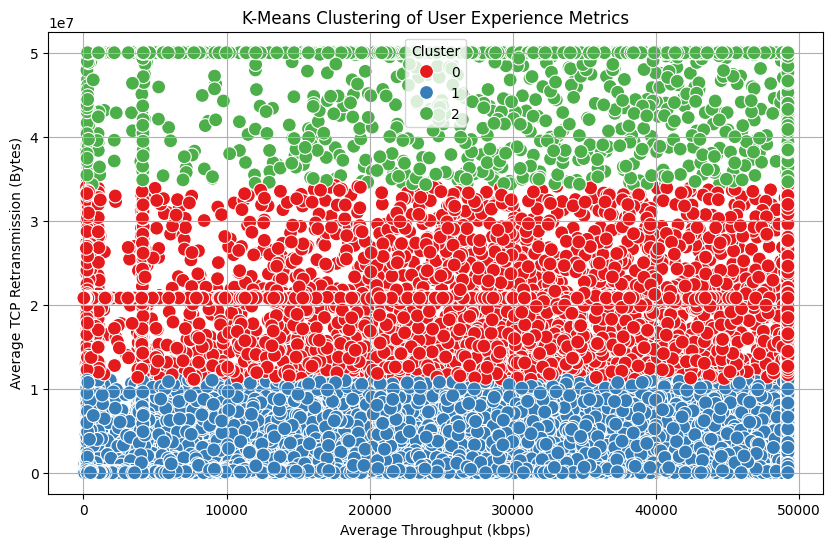

In [23]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Avg Bearer TP DL (kbps)', y='TCP DL Retrans. Vol (Bytes)', hue='Cluster', palette='Set1', s=100)
plt.title('K-Means Clustering of User Experience Metrics')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.grid()
plt.legend(title='Cluster')
plt.show()

In [37]:
# Describe each cluster
cluster_description = df.groupby('Cluster').agg(
    Average_Throughput=('Avg Bearer TP DL (kbps)', 'mean'),
    Average_TCP_Retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean'),
    Count=('MSISDN/Number', 'count')
).reset_index()

print("Cluster Descriptions:")
print(cluster_description)

Cluster Descriptions:
   Cluster  Average_Throughput  Average_TCP_Retransmission  Count
0        0         2165.452167                2.073803e+07  92362
1        1        24973.072419                1.467944e+06  53187
2        2        35533.677273                4.777687e+07   3386


In [25]:
# Interpretation of clusters
for index, row in cluster_description.iterrows():
    print(f"\nCluster {row['Cluster']}:")
    print(f"- Average Throughput: {row['Average_Throughput']:.2f} kbps")
    print(f"- Average TCP Retransmission: {row['Average_TCP_Retransmission']:.2f} Bytes")
    print(f"- Number of Users in Cluster: {row['Count']}")
    
    # Description based on the characteristics
    if row['Average_Throughput'] > 1000 and row['Average_TCP_Retransmission'] < 100:
        print("- Description: High-performing users with excellent throughput and minimal retransmissions.")
    elif row['Average_Throughput'] > 500:
        print("- Description: Moderate-performing users with decent throughput but higher retransmissions.")
    else:
        print("- Description: Low-performing users experiencing poor throughput and high retransmissions.")


Cluster 0.0:
- Average Throughput: 2165.45 kbps
- Average TCP Retransmission: 20738032.87 Bytes
- Number of Users in Cluster: 92362.0
- Description: Moderate-performing users with decent throughput but higher retransmissions.

Cluster 1.0:
- Average Throughput: 24973.07 kbps
- Average TCP Retransmission: 1467943.99 Bytes
- Number of Users in Cluster: 53187.0
- Description: Moderate-performing users with decent throughput but higher retransmissions.

Cluster 2.0:
- Average Throughput: 35533.68 kbps
- Average TCP Retransmission: 47776872.93 Bytes
- Number of Users in Cluster: 3386.0
- Description: Moderate-performing users with decent throughput but higher retransmissions.


In [27]:
##Task4----Satisfaction analysis
print("##Task4----Satisfaction analysis")

##Task4----Satisfaction analysis


In [39]:
# Load the dataset
data = pd.read_csv('aggregated_user_experience.csv')  # Adjust the filename as necessary

# Assuming the previous clustering results are present
# If clustering hasn't been done, perform k-means clustering here
# kmeans = KMeans(n_clusters=3, random_state=42)
# data['Cluster'] = kmeans.fit_predict(data[['Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']])

# Calculate the centroids of each cluster
cluster_centers = df.groupby('Cluster').agg(
    Average_Throughput=('Avg Bearer TP DL (kbps)', 'mean'),
    Average_TCP_Retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean')
).reset_index()

In [40]:

# Identify the least engaged cluster (assumed to be the cluster with the lowest average throughput)
least_engaged_cluster = cluster_centers.loc[cluster_centers['Average_Throughput'].idxmin()]

# Extract the centroid coordinates for the least engaged cluster
least_engaged_centroid = least_engaged_cluster[['Average_Throughput', 'Average_TCP_Retransmission']].values

In [42]:

import numpy as np
# Function to calculate the Euclidean distance
def euclidean_distance(row, centroid):
    return np.sqrt(np.sum((row[['Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']].values - centroid) ** 2))

# Calculate engagement score for each user
df['Engagement_Score'] = df.apply(lambda row: euclidean_distance(row, least_engaged_centroid), axis=1)

# Display the updated DataFrame with engagement scores
print("Data with Engagement Scores:")
print(df[['MSISDN/Number', 'Engagement_Score']].head())

# Optionally save the updated data to a new CSV file
df.to_csv('user_engagement_with_scores.csv', index=False)


Data with Engagement Scores:
   MSISDN/Number  Engagement_Score
0   3.366496e+10      71913.318430
1   3.368185e+10      71913.527315
2   3.376063e+10      71913.826904
3   3.375034e+10      71912.695858
4   3.369980e+10      71913.826904


In [32]:
data

,MSISDN/Number,Average_TCP_Retransmission,Average_RTT,Handset_Type,Average_Throughput
0,3.360100e+10,2.080991e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,37.0
1,3.360100e+10,2.080991e+07,30.000000,Apple iPhone 7 (A1778),48.0
2,3.360100e+10,2.080991e+07,109.795706,undefined,48.0
3,3.360101e+10,1.066000e+03,69.000000,Apple iPhone 5S (A1457),204.0
4,3.360101e+10,1.507977e+07,57.000000,Apple iPhone Se (A1723),20197.5
...,...,...,...,...,...
106851,3.379000e+10,2.150440e+05,42.000000,Huawei Honor 9 Lite,9978.0
106852,3.379000e+10,2.080991e+07,34.000000,Apple iPhone 8 Plus (A1897),68.0
106853,3.197021e+12,2.080991e+07,109.795706,Quectel Wireless. Quectel Ec25-E,1.0
106854,3.370000e+14,2.080991e+07,109.795706,Huawei B525S-23A,11.0


In [33]:
print(data.columns.tolist())

['MSISDN/Number', 'Average_TCP_Retransmission', 'Average_RTT', 'Handset_Type', 'Average_Throughput']


In [44]:

# Load the dataset
data = pd.read_csv('aggregated_user_experience.csv')  # Adjust the filename as necessary

# Assuming the previous clustering results are present
# If not, perform k-means clustering again here as shown in Task 3.4

# Calculate the centroids of each cluster
cluster_centers = df.groupby('Cluster').agg(
    Average_Throughput=('Avg Bearer TP DL (kbps)', 'mean'),
    Average_TCP_Retransmission=('TCP DL Retrans. Vol (Bytes)', 'mean')
).reset_index()

In [45]:

# Identify the worst experience cluster (assumed to be the cluster with the highest average TCP retransmission)
worst_experience_cluster = cluster_centers.loc[cluster_centers['Average_TCP_Retransmission'].idxmax()]

# Extract the centroid coordinates for the worst experience cluster
worst_experience_centroid = worst_experience_cluster[['Average_Throughput', 'Average_TCP_Retransmission']].values


In [47]:
# Function to calculate the Euclidean distance
def euclidean_distance(row, centroid):
    return np.sqrt(np.sum((row[['Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']].values - centroid) ** 2))

# Calculate experience score for each user
df['Experience_Score'] = df.apply(lambda row: euclidean_distance(row, worst_experience_centroid), axis=1)

In [50]:

# Display the updated DataFrame with experience scores
print("Data with Experience Scores:")
print(df[['MSISDN/Number', 'Experience_Score']].head())

# Optionally save the updated data to a new CSV file
df.to_csv('user_experience_with_scores.csv', index=False)

Data with Experience Scores:
   MSISDN/Number  Experience_Score
0   3.366496e+10      2.696698e+07
1   3.368185e+10      2.696698e+07
2   3.376063e+10      2.696698e+07
3   3.375034e+10      2.696698e+07
4   3.369980e+10      2.696698e+07


In [52]:

# Load the dataset with engagement and experience scores
data = pd.read_csv('user_engagement_with_scores.csv')  # Adjust the filename as necessary

# Assuming the Engagement_Score and Experience_Score columns exist
# Calculate the Satisfaction Score
df['Satisfaction_Score'] = (df['Engagement_Score'] + df['Experience_Score']) / 2


In [54]:
# Get the top 10 satisfied customers based on Satisfaction Score
top_satisfied_customers = df.nlargest(10, 'Satisfaction_Score')

# Display the top 10 satisfied customers
print("Top 10 Satisfied Customers:")
print(top_satisfied_customers[['MSISDN/Number', 'Satisfaction_Score', 'Engagement_Score', 'Experience_Score']])

Top 10 Satisfied Customers:
        MSISDN/Number  Satisfaction_Score  Engagement_Score  Experience_Score
59717    3.366454e+10        3.425746e+07      2.073803e+07      4.777688e+07
125094   3.376154e+10        3.425746e+07      2.073803e+07      4.777688e+07
39610    3.376154e+10        3.425746e+07      2.073803e+07      4.777688e+07
60376    3.369900e+10        3.425746e+07      2.073803e+07      4.777688e+07
143429   3.376162e+10        3.425746e+07      2.073803e+07      4.777688e+07
52488    3.376394e+10        3.425746e+07      2.073803e+07      4.777688e+07
75093    3.376151e+10        3.425746e+07      2.073803e+07      4.777688e+07
100314   3.366933e+10        3.425746e+07      2.073803e+07      4.777688e+07
60426    3.376399e+10        3.425746e+07      2.073803e+07      4.777688e+07
2850     3.369906e+10        3.425746e+07      2.073803e+07      4.777688e+07


In [57]:
# Optionally save the updated data to a new CSV file
df.to_csv('user_scores_with_engagement_experience.csv', index=False)

In [58]:

# Load the dataset with engagement, experience, and satisfaction scores
data = pd.read_csv('user_scores_with_engagement_experience.csv')  # Adjust the filename as necessary

# Check the columns to verify we have the necessary scores
print("Columns in the DataFrame:")
print(data.columns.tolist())


Columns in the DataFrame:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (B

In [60]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define the features and target variable
features = ['Engagement_Score', 'Experience_Score']
target = 'Satisfaction_Score'

# Ensure the target variable exists
if target not in data.columns:
    # Calculate Satisfaction Score as the average of Engagement and Experience Scores
    data[target] = (data['Engagement_Score'] + data['Experience_Score']) / 2

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:

# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Display the coefficients
print("Model Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

Mean Squared Error: 0.00
R² Score: 1.00
Model Coefficients:
Engagement_Score: 0.5000
Experience_Score: 0.5000


In [62]:
# Load the dataset with engagement and experience scores
data = pd.read_csv('user_scores_with_engagement_experience.csv')  # Adjust the filename as necessary

# Check the columns to verify we have the necessary scores
print("Columns in the DataFrame:")
print(data.columns.tolist())

# Select the relevant features for clustering
features = data[['Engagement_Score', 'Experience_Score']]

Columns in the DataFrame:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (B

In [63]:

# Run k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
data['Engagement_Experience_Cluster'] = kmeans.fit_predict(features)

# Display the cluster assignments
print("Data with Cluster Assignments:")
print(data[['MSISDN/Number', 'Engagement_Score', 'Experience_Score', 'Engagement_Experience_Cluster']].head())

Data with Cluster Assignments:
   MSISDN/Number  Engagement_Score  Experience_Score  \
0   3.366496e+10      71913.318430      2.696698e+07   
1   3.368185e+10      71913.527315      2.696698e+07   
2   3.376063e+10      71913.826904      2.696698e+07   
3   3.375034e+10      71912.695858      2.696698e+07   
4   3.369980e+10      71913.826904      2.696698e+07   

   Engagement_Experience_Cluster  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  


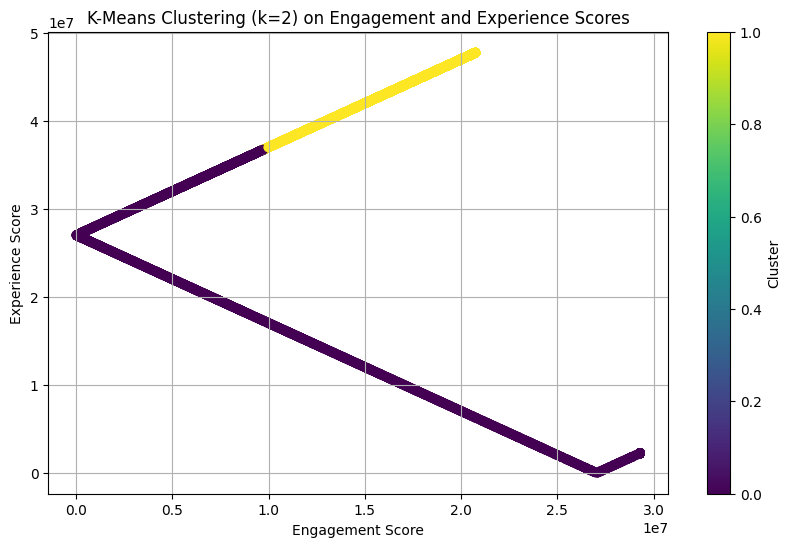

In [64]:

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Engagement_Score'], data['Experience_Score'], c=data['Engagement_Experience_Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering (k=2) on Engagement and Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [65]:
# Optionally save the updated data with cluster assignments
data.to_csv('user_scores_with_clusters.csv', index=False)

In [66]:

# Load the dataset with cluster assignments and scores
data = pd.read_csv('user_scores_with_clusters.csv')  # Adjust the filename as necessary

# Check the columns to verify we have the necessary scores and cluster assignments
print("Columns in the DataFrame:")
print(data.columns.tolist())

Columns in the DataFrame:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (B

In [67]:

# Calculate the average satisfaction and experience scores per cluster
average_scores = data.groupby('Engagement_Experience_Cluster').agg(
    Average_Satisfaction_Score=('Satisfaction_Score', 'mean'),
    Average_Experience_Score=('Experience_Score', 'mean')
).reset_index()

# Display the aggregated average scores
print("Average Satisfaction and Experience Scores per Cluster:")
print(average_scores)

# Optionally save the aggregated scores to a new CSV file
average_scores.to_csv('average_scores_per_cluster.csv', index=False)

Average Satisfaction and Experience Scores per Cluster:
   Engagement_Experience_Cluster  Average_Satisfaction_Score  \
0                              0                1.375300e+07   
1                              1                3.279718e+07   

   Average_Experience_Score  
0              2.620507e+07  
1              4.631659e+07  


In [69]:

import pandas as pd
import psycopg2
# Load the dataset with user engagement, experience, and satisfaction scores
data = pd.read_csv('user_scores_with_clusters.csv')  # Adjust the filename as necessary


In [70]:
# Define PostgreSQL connection parameters
db_config = {
    'dbname': 'telecom',      
    'user': 'postgres',        
    'password': 'postgres',    
    'host': 'localhost',            
    'port': '5432'                  
}

In [71]:

# Connect to the PostgreSQL database
try:
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

    # Create a table if it doesn't exist
    create_table_query = """
    CREATE TABLE IF NOT EXISTS user_scores (
        MSISDN_Number VARCHAR(20),
        Engagement_Score FLOAT,
        Experience_Score FLOAT,
        Satisfaction_Score FLOAT,
        Engagement_Experience_Cluster INT
    )
    """
    cursor.execute(create_table_query)

    # Prepare the data for insertion
    for index, row in data.iterrows():
        insert_query = """
        INSERT INTO user_scores (MSISDN_Number, Engagement_Score, Experience_Score, Satisfaction_Score, Engagement_Experience_Cluster)
        VALUES (%s, %s, %s, %s, %s)
        """
        cursor.execute(insert_query, (row['MSISDN/Number'], row['Engagement_Score'], row['Experience_Score'], row['Satisfaction_Score'], row['Engagement_Experience_Cluster']))

    # Commit the transaction
    conn.commit()
    
    print("Data exported successfully to PostgreSQL database.")

except psycopg2.Error as err:
    print(f"Error: {err}")

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()

Data exported successfully to PostgreSQL database.
